# Module Import

In [ ]:
!pip install wget

In [ ]:
!pip uninstall Cython -y

In [ ]:
!pip install Cython

In [1]:
import os
import wget
import shutil

# Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
!mkdir Tensorflow

In [ ]:
%cd Tensorflow

In [ ]:
!git clone --depth 1 https://github.com/tensorflow/models

In [ ]:
%cd ..

In [ ]:
%cd Tensorflow/models/research/

In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
%cd ..

In [ ]:
%cd ..

In [ ]:
%cd ..

In [ ]:
import re
with open('Tensorflow/models/research/object_detection/packages/tf2/setup.py') as f:
    s = f.read()

with open('Tensorflow/models/research/setup.py', 'w') as f:
    s = re.sub('tf-models-official>=2.5.1',
               'tf-models-official==2.8.0', s)
    f.write(s)

In [ ]:
!pip install pyyaml==5.3.1
!pip install Tensorflow/models/research/
!pip install tensorflow==2.8.0

In [ ]:
!python Tensorflow/models/research/object_detection/builders/model_builder_tf2_test.py

# Setup Paths

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'create_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME),
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'),
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'),
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
}

files = {
        'PIPELINE_CONFIG': os.path.join('Tensorflow', 'workspace', 'models', CUSTOM_MODEL_NAME, 'pipeline.config'),
        'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME),
        'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [3]:
for path in paths.values():
    if not os.path.exists(path):
            !mkdir {path}

In [ ]:
wget.download('http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz')
shutil.move(PRETRAINED_MODEL_NAME+".tar.gz", paths["PRETRAINED_MODEL_PATH"])

In [ ]:
%cd Tensorflow/workspace/pre-trained-models/

In [ ]:
!tar -zxvf {PRETRAINED_MODEL_NAME+".tar.gz"}

In [ ]:
%cd ../..

In [ ]:
%cd ..

# 2. Connection to Roboflow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="w7DdT0ct3T04B2jsikB1")
project = rf.workspace("pren-pc9i4").project("cubes-khnik")
dataset = project.version(5).download("tensorflow")

In [ ]:
!move Cubes-5/train Tensorflow/workspace/images

In [ ]:
labels = [{'name':'Blue-Blue-Blue-Blue', 'id':1},{'name':'Blue-Blue-Blue-Nothing', 'id':2},{'name':'Blue-Blue-Blue-Red', 'id':3},{'name':'Blue-Blue-Blue-Yellow', 'id':4},
          {'name':'Blue-Blue-Nothing-Blue', 'id':5},{'name':'Blue-Blue-Nothing-Nothing', 'id':5},{'name':'Blue-Blue-Nothing-Red', 'id':6},{'name':'Blue-Blue-Nothing-Yellow', 'id':7},
          {'name':'Blue-Blue-Red-Blue', 'id':8},{'name':'Blue-Blue-Red-Nothing', 'id':9},{'name':'Blue-Blue-Red-Red', 'id':10},{'name':'Blue-Blue-Red-Yellow', 'id':11},
          {'name':'Blue-Blue-Yellow-Blue', 'id':12},{'name':'Blue-Blue-Yellow-Nothing', 'id':13},{'name':'Blue-Blue-Yellow-Red', 'id':14},{'name':'Blue-Blue-Yellow-Yellow', 'id':15},
          {'name':'Blue-Nothing-Nothing-Blue', 'id':16},{'name':'Blue-Nothing-Nothing-Nothing', 'id':17},{'name':'Blue-Nothing-Nothing-Red', 'id':18},{'name':'Blue-Nothing-Nothing-Yellow', 'id':19},
          {'name':'Blue-Red-Blue-Blue', 'id':20},{'name':'Blue-Red-Blue-Nothing', 'id':21},{'name':'Blue-Red-Blue-Red', 'id':22},{'name':'Blue-Red-Blue-Yellow', 'id':23},
          {'name':'Blue-Red-Nothing-Blue', 'id':24},{'name':'Blue-Red-Nothing-Nothing', 'id':25},{'name':'Blue-Red-Nothing-Red', 'id':26},{'name':'Blue-Red-Nothing-Yellow', 'id':27},
          {'name':'Blue-Red-Red-Blue', 'id':28},{'name':'Blue-Red-Red-Nothing', 'id':29},{'name':'Blue-Red-Red-Red', 'id':30},{'name':'Blue-Red-Red-Yellow', 'id':31},
          {'name':'Blue-Red-Yellow-Blue', 'id':32},{'name':'Blue-Red-Yellow-Nothing', 'id':33},{'name':'Blue-Red-Yellow-Red', 'id':34},{'name':'Blue-Red-Yellow-Yellow', 'id':35},
          {'name':'Blue-Yellow-Blue-Blue', 'id':36},{'name':'Blue-Yellow-Blue-Nothing', 'id':37},{'name':'Blue-Yellow-Blue-Red', 'id':38},{'name':'Blue-Yellow-Blue-Yellow', 'id':39},
          {'name':'Blue-Yellow-Nothing-Blue', 'id':40},{'name':'Blue-Yellow-Nothing-Nothing', 'id':41},{'name':'Blue-Yellow-Nothing-Red', 'id':42},{'name':'Blue-Yellow-Nothing-Yellow', 'id':43},
          {'name':'Blue-Yellow-Red-Blue', 'id':44},{'name':'Blue-Yellow-Red-Nothing', 'id':45},{'name':'Blue-Yellow-Red-Red', 'id':46},{'name':'Blue-Yellow-Red-Yellow', 'id':47},
          {'name':'Blue-Yellow-Yellow-Blue', 'id':48},{'name':'Blue-Yellow-Yellow-Nothing', 'id':49},{'name':'Blue-Yellow-Yellow-Red', 'id':50},{'name':'Blue-Yellow-Yellow-Yellow', 'id':51},
          {'name':'Nothing-Blue-Blue-Nothing', 'id':52},{'name':'Nothing-Blue-Nothing-Nothing', 'id':53},{'name':'Nothing-Blue-Red-Nothing', 'id':54},{'name':'Nothing-Blue-Yellow-Nothing', 'id':55},
          {'name':'Nothing-Nothing-Nothing-Nothing', 'id':56},{'name':'Nothing-Nothing-Yellow-Nothing', 'id':57},{'name':'Nothing-Red-Blue-Nothing', 'id':58},{'name':'Nothing-Red-Nothing-Nothing', 'id':59},
          {'name':'Nothing-Red-Red-Nothing', 'id':60},{'name':'Nothing-Red-Yellow-Nothing', 'id':61},{'name':'Nothing-Yellow-Blue-Nothing', 'id':62},{'name':'Nothing-Yellow-Red-Nothing', 'id':63},
          {'name':'Nothing-Yellow-Yellow-Nothing', 'id':64},{'name':'Red-Blue-Blue-Blue', 'id':65},{'name':'Red-Blue-Blue-Nothing', 'id':66},{'name':'Red-Blue-Blue-Red', 'id':67},
          {'name':'Red-Blue-Blue-Yellow', 'id':68},{'name':'Red-Blue-Nothing-Blue', 'id':69},{'name':'Red-Blue-Nothing-Nothing', 'id':70},{'name':'Red-Blue-Nothing-Red', 'id':71},
          {'name':'Red-Blue-Nothing-Yellow', 'id':72},{'name':'Red-Blue-Red-Blue', 'id':73},{'name':'Red-Blue-Red-Nothing', 'id':74},{'name':'Red-Blue-Red-Red', 'id':75},
          {'name':'Red-Blue-Red-Yellow', 'id':76},{'name':'Red-Blue-Yellow-Blue', 'id':77},{'name':'Red-Blue-Yellow-Nothing', 'id':78},{'name':'Red-Blue-Yellow-Red', 'id':79},
          {'name':'Red-Blue-Yellow-Yellow', 'id':80},{'name':'Red-Nothing-Nothing-Blue', 'id':81},{'name':'Red-Nothing-Nothing-Nothing', 'id':82},{'name':'Red-Nothing-Nothing-Red', 'id':83},
          {'name':'Red-Nothing-Nothing-Yellow', 'id':84},{'name':'Red-Red-Blue-Blue', 'id':85},{'name':'Red-Red-Blue-Nothing', 'id':86},{'name':'Red-Red-Blue-Red', 'id':87},
          {'name':'Red-Red-Blue-Yellow', 'id':88},{'name':'Red-Red-Nothing-Blue', 'id':89},{'name':'Red-Red-Nothing-Nothing', 'id':90},{'name':'Red-Red-Nothing-Red', 'id':91},
          {'name':'Red-Red-Nothing-Yellow', 'id':92},{'name':'Red-Red-Red-Blue', 'id':93},{'name':'Red-Red-Red-Nothing', 'id':94},{'name':'Red-Red-Red-Red', 'id':95},
          {'name':'Red-Red-Red-Yellow', 'id':96},{'name':'Red-Red-Yellow-Blue', 'id':97},{'name':'Red-Red-Yellow-Nothing', 'id':98},{'name':'Red-Red-Yellow-Red', 'id':99},
          {'name':'Red-Red-Yellow-Yellow', 'id':100},{'name':'Red-Yellow-Blue-Blue', 'id':101},{'name':'Red-Yellow-Blue-Nothing', 'id':102},{'name':'Red-Yellow-Blue-Red', 'id':103},
          {'name':'Red-Yellow-Blue-Yellow', 'id':104},{'name':'Red-Yellow-Nothing-Blue', 'id':105},{'name':'Red-Yellow-Nothing-Nothing', 'id':106},{'name':'Red-Yellow-Nothing-Red', 'id':107},
          {'name':'Red-Yellow-Nothing-Yellow', 'id':108},{'name':'Red-Yellow-Red-Blue', 'id':109},{'name':'Red-Yellow-Red-Nothing', 'id':110},{'name':'Red-Yellow-Red-Red', 'id':111},
          {'name':'Red-Yellow-Red-Yellow', 'id':112},{'name':'Red-Yellow-Yellow-Blue', 'id':113},{'name':'Red-Yellow-Yellow-Nothing', 'id':114},{'name':'Red-Yellow-Yellow-Red', 'id':115},
          {'name':'Red-Yellow-Yellow-Yellow', 'id':116},{'name':'Yellow-Blue-Blue-Blue', 'id':117},{'name':'Yellow-Blue-Blue-Nothing', 'id':118},{'name':'Yellow-Blue-Blue-Red', 'id':119},
          {'name':'Yellow-Blue-Blue-Yellow', 'id':120},{'name':'Yellow-Blue-Nothing-Blue', 'id':121},{'name':'Yellow-Blue-Nothing-Nothing', 'id':122},{'name':'Yellow-Blue-Nothing-Red', 'id':123},
          {'name':'Yellow-Blue-Nothing-Yellow', 'id':124},{'name':'Yellow-Blue-Red-Blue', 'id':125},{'name':'Yellow-Blue-Red-Nothing', 'id':126},{'name':'Yellow-Blue-Red-Red', 'id':127},
          {'name':'Yellow-Blue-Red-Yellow', 'id':128},{'name':'Yellow-Blue-Yellow-Blue', 'id':129},{'name':'Yellow-Blue-Yellow-Nothing', 'id':130},{'name':'Yellow-Blue-Yellow-Red', 'id':131},
          {'name':'Yellow-Blue-Yellow-Yellow', 'id':132},{'name':'Yellow-Nothing-Nothing-Blue', 'id':133},{'name':'Yellow-Nothing-Nothing-Nothing', 'id':134},{'name':'Yellow-Nothing-Nothing-Red', 'id':135},
          {'name':'Yellow-Nothing-Nothing-Yellow', 'id':136},{'name':'Yellow-Red-Blue-Blue', 'id':137},{'name':'Yellow-Red-Blue-Nothing', 'id':138},{'name':'Yellow-Red-Blue-Red', 'id':139},
          {'name':'Yellow-Red-Blue-Yellow', 'id':140},{'name':'Yellow-Red-Nothing-Blue', 'id':141},{'name':'Yellow-Red-Nothing-Nothing', 'id':142},{'name':'Yellow-Red-Nothing-Red', 'id':143},
          {'name':'Yellow-Red-Nothing-Yellow', 'id':144},{'name':'Yellow-Red-Red-Blue', 'id':145},{'name':'Yellow-Red-Red-Nothing', 'id':146},{'name':'Yellow-Red-Red-Red', 'id':147},
          {'name':'Yellow-Red-Red-Yellow', 'id':148},{'name':'Yellow-Red-Yellow-Blue', 'id':149},{'name':'Yellow-Red-Yellow-Nothing', 'id':150},{'name':'Yellow-Red-Yellow-Red', 'id':151},
          {'name':'Yellow-Red-Yellow-Yellow', 'id':152},{'name':'Yellow-Yellow-Blue-Blue', 'id':153},{'name':'Yellow-Yellow-Blue-Nothing', 'id':154},{'name':'Yellow-Yellow-Blue-Red', 'id':155},
          {'name':'Yellow-Yellow-Blue-Yellow', 'id':156},{'name':'Yellow-Yellow-Nothing-Blue', 'id':157},{'name':'Yellow-Yellow-Nothing-Nothing', 'id':158},{'name':'Yellow-Yellow-Nothing-Red', 'id':159},
          {'name':'Yellow-Yellow-Nothing-Yellow', 'id':160},{'name':'Yellow-Yellow-Red-Blue', 'id':161},{'name':'Yellow-Yellow-Red-Nothing', 'id':162},{'name':'Yellow-Yellow-Red-Red', 'id':163},
          {'name':'Yellow-Yellow-Red-Yellow', 'id':164},{'name':'Yellow-Yellow-Yellow-Blue', 'id':165},{'name':'Yellow-Yellow-Yellow-Nothing', 'id':166},{'name':'Yellow-Yellow-Yellow-Red', 'id':167},
          {'name':'Yellow-Yellow-Yellow-Yellow', 'id':168}]


with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
%cd Tensorflow/scripts/

In [ ]:
!wget https://raw.githubusercontent.com/flawas/TA.BA_PREN_PY_ObjectDetection/main/Roboflow/Script/create_tfrecord.py

In [ ]:
%cd ../..

In [ ]:
!python Tensorflow/scripts/create_tfrecord.py --csv_input=Tensorflow/workspace/images/train/_annotations.csv --labelmap=Tensorflow/workspace/annotations/label_map.pbtxt --image_dir=Tensorflow/workspace/images/train --output_path=Tensorflow/workspace/annotations/train.record

In [ ]:
#!python3 /content/Tensorflow/scripts/generate_tfrecord.py --csv_input=/content/Cubes-4/train/_annotations.csv --labelmap=/content/Tensorflow/workspace/annotations/label_map.pbtxt --image_dir=/content/Cubes-4/train --output_path=train.record

# 4. Copy Model Config to Training Folder

In [ ]:
!copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [5]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [6]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [7]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 640
       width: 640
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [8]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)

In [9]:
pipeline_config.train_config.batch_size = 16
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [10]:
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], 'wb') as f:
    f.write(config_text)

In [11]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

# 6. Train the model

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=7500".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'], files['PIPELINE_CONFIG'])

In [ ]:
print(command)

In [ ]:
!{command}

# 7. Evaluate the Model

In [16]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [17]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [18]:
!{command}

^C


2024-03-03 11:49:13.462997: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2024-03-03 11:49:13.463027: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
C:\Users\Silvan Mangold\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\Silvan Mangold\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\util

# 8. Load Train Model From Checkpoint

In [4]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [5]:
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-5')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [8]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', "38d2d1a3-d229-11ee-952a-8cf8c50016cf.jpg")

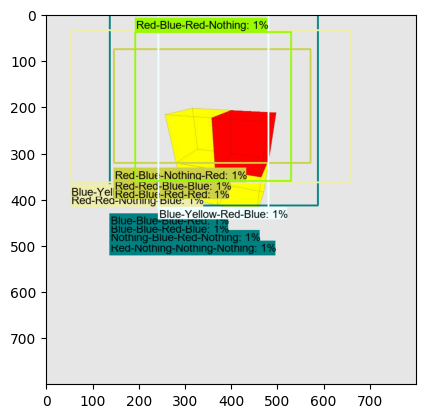

In [24]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.001,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Freezing the Graph

In [ ]:
FREEEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --outbut_directory={}.format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'], files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --outbut_directory={}.format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'], files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection','export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')